# Sobel Operator

Use two different kernels, one to detect horizontal changes $G_{x}$ and the other to detect vertical changes $G_{y}$.

 $$ G_{x} =\begin{pmatrix}
    -1 & 0 & 1 \\
    -2 & 0 & 2 \\
    -1 & 0 & 1
 \end{pmatrix} $$

and

  $$ G_{y} =\begin{pmatrix}
    -1 & -2 & -1 \\
    0 & 0 & 0 \\
    1 & 2 & 1
 \end{pmatrix} $$

 So, we apply the kernels (convolution) in the image separately. And, finally, we combine the two images to get the image segmented with a sobel edge detector.

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [25]:
image = cv2.imread('images/landscape.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

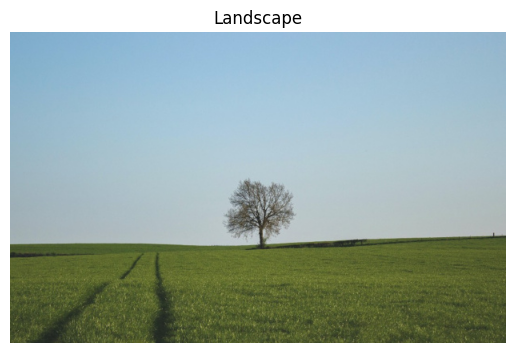

In [26]:
plt.imshow(image)
plt.title('Landscape')
plt.axis('off')

plt.show()

In [27]:
gray_image  = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

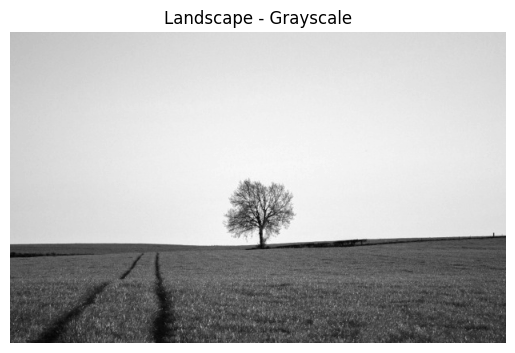

In [28]:
plt.imshow(gray_image, cmap='gray')
plt.title('Landscape - Grayscale')
plt.axis('off')

plt.show()

In [31]:
blurred_image = cv2.GaussianBlur(gray_image, (5, 5),  0)

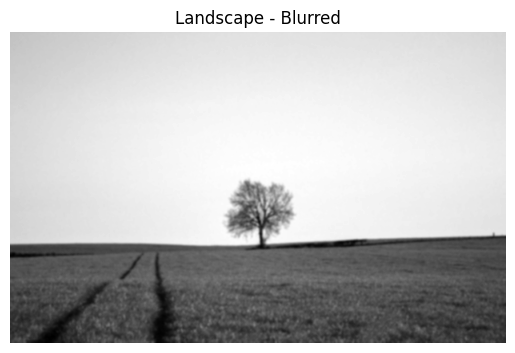

In [32]:
plt.imshow(blurred_image, cmap='gray')
plt.title('Landscape - Blurred')
plt.axis('off')

plt.show()

In [33]:
xsobel = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
ysobel = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

xsobel = cv2.convertScaleAbs(xsobel)
ysobel = cv2.convertScaleAbs(ysobel)

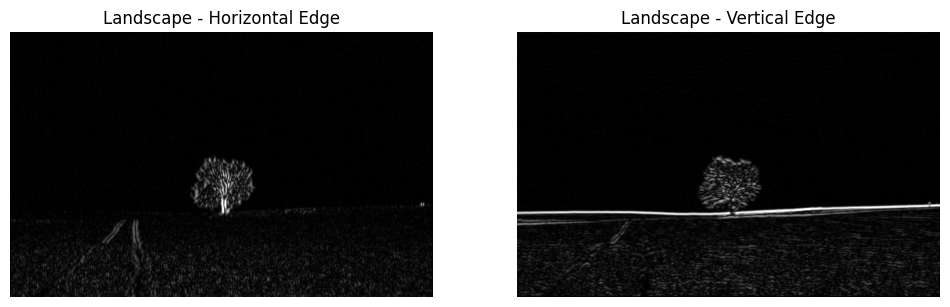

In [34]:
figure = plt.gcf()
figure.set_size_inches(12, 7)

plt.subplot(1, 2, 1)
plt.imshow(xsobel, cmap='gray')
plt.title('Landscape - Horizontal Edge')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ysobel, cmap='gray')
plt.title('Landscape - Vertical Edge')
plt.axis('off')

plt.show()

In [35]:
sobel_image = cv2.addWeighted(src1=xsobel, alpha=0.5, src2=ysobel, beta=0.5, gamma=0)

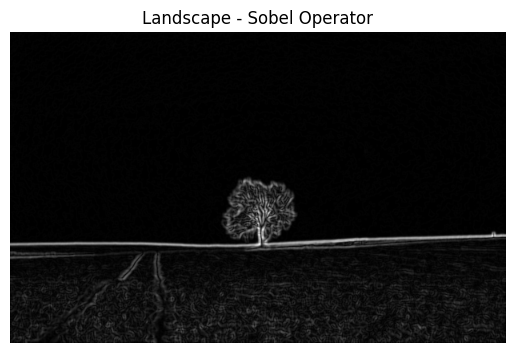

In [36]:
plt.imshow(sobel_image, cmap='gray')
plt.title('Landscape - Sobel Operator')
plt.axis('off')

plt.show()